In [0]:
# This code explores the NBA players from 2013 - 2014 basketball season, and uses
# a machine learning algorithm called kMeans to group them in clusters, this will
# show which players are most similar

#Stat Glossaries: https://www.basketball-reference.com/about/glossary.html
#                 https://stats.nba.com/help/glossary/#fta

#Resource: https://www.dataquest.io/blog/python-vs-r/

#import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#load the data 
#from google.colab import files #Only use for Google Colab
#uploaded = files.upload()      #Only use for Google Colab
nba = pd.read_csv('nba_2013.csv')# the nba_2013.csv data contains data on NBA players from 2013 - 2014 season
nba.head(7)# Print the first 7 rows of data or first 7 players

Saving nba_2013.csv to nba_2013 (2).csv


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013


In [19]:
#Get the number of rows and columns (481 rows or players , and 31 columns containing data on the players)
nba.shape

(481, 31)

In [20]:
# Find the average value for each numeric column / feature
nba.mean() # The columns have names like 'fg' (field goals made), 'ast'(assists), here is a glossary of all of the stats https://stats.nba.com/help/glossary/

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [21]:
#Get the mean / average of specific columns
# mean of the specific column
nba.loc[:,"fg"].mean()

192.88149688149687

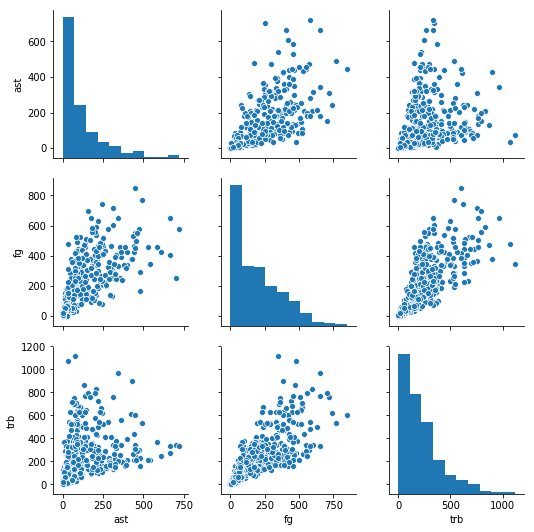

In [22]:
#Make pairwise scatter plots
# This is a common way to explore a data set to see how different columns correlate
# to others, we'll compare ast (assits), fg(field goals), trb (total rebound )
#NOTE: pairplot of all columns ==> sns.pairplot(nba)
sns.pairplot(nba[["ast", "fg", "trb"]])
plt.show()



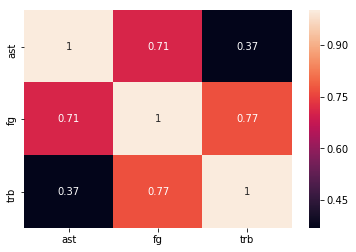

In [23]:
#Make Heat Maps to see correlations
#Note: Heat Map of all columns ==> sns.heatmap(nba.corr())
#Note: Heat Map of all columns with annotation/numbers ==> sns.heatmap(nba.corr(), annot=True)
#Heat Map of the columns ast (assits), fg(field goals), trb (total rebound ) with annotation
correlation = nba[["ast", "fg", "trb"]].corr()
sns.heatmap(correlation, annot=True)

In [24]:
# Make clusters of the players using a machine learning model called kMeans
#One good way to explore this kind of data is to generate cluster plots.
#This will show which players are most similar.

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)# Create a 5 cluster kmeans model
good_columns = nba._get_numeric_data().dropna(axis=1)#remove any non-numeric columns, or columns with missing values (NA, Nan, etc).
kmeans_model.fit(good_columns)# Train the model
labels = kmeans_model.labels_ # Get the labels or (cluster label for each player)
labels


array([0, 0, 0, 3, 0, 2, 3, 0, 4, 4, 4, 2, 4, 4, 1, 0, 4, 3, 2, 0, 1, 2,
       0, 0, 1, 2, 0, 2, 2, 2, 4, 4, 1, 4, 2, 1, 4, 3, 4, 2, 0, 3, 0, 1,
       0, 4, 2, 2, 0, 4, 4, 4, 4, 2, 2, 4, 0, 4, 1, 3, 1, 4, 1, 2, 4, 2,
       2, 2, 2, 0, 2, 1, 1, 4, 1, 2, 2, 0, 0, 0, 1, 4, 2, 1, 1, 3, 4, 1,
       4, 1, 2, 2, 0, 2, 2, 4, 2, 1, 0, 3, 2, 3, 2, 2, 1, 1, 0, 4, 2, 2,
       3, 4, 2, 2, 2, 3, 0, 4, 2, 2, 2, 0, 1, 3, 1, 0, 0, 0, 3, 3, 4, 1,
       1, 3, 2, 2, 3, 2, 0, 0, 1, 1, 0, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 3, 0, 3, 1, 4, 2, 2, 2, 2, 2, 1, 3, 0, 2, 4, 4,
       1, 3, 0, 3, 2, 0, 2, 0, 4, 3, 4, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 3,
       1, 0, 1, 1, 1, 4, 1, 4, 2, 1, 0, 2, 2, 0, 3, 0, 4, 3, 4, 4, 3, 2,
       1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 0, 1, 0, 0, 3, 2, 1, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 2, 4, 4, 0, 3, 1, 4, 2, 2, 0, 4, 2, 2, 1, 2,
       1, 3, 2, 1, 2, 0, 0, 2, 3, 1, 4, 0, 1, 3, 3, 2, 4, 0, 1, 4, 0, 0,
       1, 2, 3, 2, 2, 4, 0, 0, 2, 2, 1, 1, 1, 2, 1,

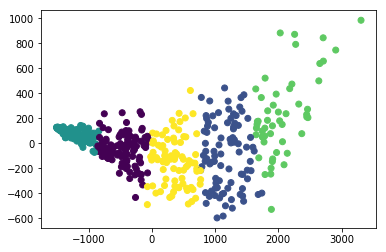

In [25]:
#Plot players by cluster
#We can now plot out the players by cluster to discover patterns. 
#One way to do this is to first use PCA to make our data 2-dimensional, 
#then plot it, and shade each point according to cluster association

#NOTE: PCA Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of 
#observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly 
#uncorrelated variables called principal components. A Dimensionality Reducing Algorithm

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [26]:
#Show plot points
plot_columns

array([[-6.27969797e+02, -1.30839821e+02],
       [-2.44268597e+02, -2.04096273e+02],
       [-3.38828831e+02,  5.78889920e+01],
       [ 1.74969229e+03,  5.08746550e+01],
       [-3.83105785e+02,  4.99993062e+00],
       [-1.13423594e+03,  6.09155972e+01],
       [ 2.25796631e+03,  8.72646912e+02],
       [-2.74018472e+02, -4.91584788e+01],
       [ 6.51594149e+02, -3.68598261e+02],
       [ 2.80257375e+01,  4.17702838e+00],
       [ 7.72722373e+02, -2.88996107e+02],
       [-1.30782656e+03,  7.78270023e+01],
       [ 7.46758527e+01, -1.13379495e+02],
       [ 4.27602950e+02, -3.54396243e+02],
       [ 1.11065367e+03, -4.05383385e+02],
       [-4.74415284e+02,  9.09308787e+01],
       [ 5.49938152e+02, -3.57592577e+02],
       [ 2.90757493e+03,  7.46898936e+02],
       [-1.31941705e+03,  6.64245173e+01],
       [-4.21874643e+02, -7.17577224e+01],
       [ 1.68210924e+03, -4.08218490e+02],
       [-1.39428553e+03,  1.10713700e+02],
       [-1.22831506e+02, -1.78978791e+01],
       [-4.

In [27]:
#Find the 'good columns' data for the player LeBron James
#again by 'good columns' I mean with only numeric values, and no missing values (NA, Nan, etc).

# Find player LeBron
LeBron = good_columns.loc[ nba['player'] == 'LeBron James',: ]

#Find player Durant
Durant = good_columns.loc[ nba['player'] == 'Kevin Durant',: ]

#print the players
print(LeBron)
print(Durant)

     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
225   29  77  77  2902  767  1353  ...  121   26  270  126  2089        2013

[1 rows x 22 columns]
     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
133   25  81  81  3122  849  1688  ...  103   59  285  174  2593        2013

[1 rows x 22 columns]


In [33]:
#Change the dataframe to a list Lebron to be able to use the kmeans model to make predictions/grouping
Lebron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

#Predict which group LeBron James and Kevin Durant belongs
LeBron_Cluster_Label = kmeans_model.predict(Lebron_list)
Durant_Cluster_Label = kmeans_model.predict(Durant_list)

print(LeBron_Cluster_Label)
print(Durant_Cluster_Label)

[3]
[3]


In [29]:

# Look at all of the column coorelations
nba.corr() #Note there is a positive coorelation between minutes played(mp) and points(pts)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,-0.028862,-0.035970,0.011306,0.073002,-0.046554,-0.061751,0.021481,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,0.684729,0.694243,0.283050,0.351884,0.598333,0.615001,0.252328,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,0.785619,0.784812,0.205289,0.231222,0.707049,0.720527,0.178607,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,0.863941,0.874109,0.243727,0.304770,0.805468,0.814450,0.278872,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,0.960853,0.962059,0.238487,0.277694,0.893619,0.895138,0.277730,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,0.924781,0.944490,0.185373,0.236838,0.887922,0.877945,0.312489,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,0.333179,0.283523,0.880201,0.908930,0.217450,0.258550,-0.008697,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,0.351640,0.382531,0.041768,0.219614,0.503353,0.441246,0.369515,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,0.374057,0.408290,0.042401,0.196420,0.527835,0.467615,0.370768,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,-0.032484,-0.013775,-0.118689,0.296875,0.059541,0.017214,0.289435,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [0]:
# Let’s say we want to predict number of assists per player from field goals made per player.
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['fg']], nba[['ast']], test_size=0.2, random_state=42)

In [31]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Create the model
lr.fit(x_train, y_train) #Train the model
predictions = lr.predict(x_test) #Make predictions on the test data

print(predictions)
print(y_test)

[[121.94310565]
 [ 24.72153471]
 [ 77.60579583]
 [252.28411286]
 [219.69886106]
 [ 70.12721345]
 [ 17.77713678]
 [178.03247351]
 [ 58.37515542]
 [ 70.12721345]
 [117.13544555]
 [ 30.06337926]
 [214.3570165 ]
 [ 24.18735025]
 [143.84466834]
 [ 22.05061243]
 [133.69516368]
 [  9.23018549]
 [131.55842586]
 [167.88296885]
 [ 21.51642797]
 [ 45.02054402]
 [ 31.13174818]
 [102.17828079]
 [233.05347245]
 [ 67.45629117]
 [236.25857919]
 [ 38.0761461 ]
 [ 64.78536889]
 [ 43.41799066]
 [  8.69600103]
 [ 16.70876787]
 [119.80636783]
 [266.17290871]
 [ 24.18735025]
 [152.92580409]
 [151.85743518]
 [ 22.58479688]
 [ 38.0761461 ]
 [ 14.57203005]
 [ 16.17458341]
 [301.42908279]
 [  8.16181658]
 [160.93857092]
 [ 46.08891294]
 [  9.76436994]
 [  8.16181658]
 [ 16.17458341]
 [ 71.19558236]
 [  9.76436994]
 [ 48.75983522]
 [157.73346419]
 [ 19.37969015]
 [100.04154297]
 [ 10.2985544 ]
 [ 83.48182484]
 [ 24.72153471]
 [323.86482993]
 [  9.76436994]
 [ 26.32408807]
 [ 82.94764038]
 [144.3788528 ]
 [106.45

In [32]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0 (58.78% of the variance for assists is explained by the field goals players made)
lr_confidence = lr.score(x_test, y_test)
print("lr confidence (R^2): ", lr_confidence)

# mean squared error which tells you how close a regression line is to a set of points.
from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, predictions))

lr confidence (R^2):  0.5877700445514937
Mean Squared Error (MSE):  5257.168578022499
